<a href="https://colab.research.google.com/github/bashi-03/GovermantTaxFile/blob/master/2425566_CW_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1 - Exploritary Data Analysis (EDA)**

# --- Loads and Reading Data ---

In [745]:
# Import numpy, pandas, and matplotlib, etc.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (classification_report, confusion_matrix,
                            roc_auc_score, roc_curve, accuracy_score,
                            precision_score, recall_score, f1_score)
from sklearn.utils.class_weight import compute_class_weight
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import l2
from sklearn.metrics import confusion_matrix
import time
import tensorflow as tf

from sklearn.metrics import classification_report

plt.style.use('ggplot')
pd.set_option('display.max_columns', 50)

In [746]:
# Import data from CSV file
df = pd.read_csv('/content/drive/MyDrive/CourseworkCSVFile/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# --- Understanding Data ---

In [747]:
#  Get data rows and columns
print("Orginal Shape of this dataset is (rows, columns): ", df.shape)

Orginal Shape of this dataset is (rows, columns):  (7043, 21)


In [748]:
#get first 10 values(0-9)
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [749]:
# View all the columns dataset has
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#---- Data Overview ---



*   Check Data Types
*   Identify Missing Values  
*   Identify Duplicates

In [750]:
# View Data Types  Of Each Column
print("Data Types of Each Column is\n\n",df.dtypes)

Data Types of Each Column is

 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [751]:
# view first 5 data values
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes




> Check Missing Values



In [752]:
# Check missing values according to given data types
print("--- CHECK MISSING DATA VALUES (INITIAL) ---")
missingValues = df.isnull().sum()
print(missingValues)

print(f"\nTotal missing values: {missingValues.sum()}")

--- CHECK MISSING DATA VALUES (INITIAL) ---
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Total missing values: 0


In [753]:
print("Check TotaCharges Data Type")
print(f"\nData type of TotalCharges: {df['TotalCharges'].dtype}")
print("\nSample values from TotalCharges:")
print(df['TotalCharges'].head(10).to_list())
print("According to the values TotalCharges Data Type Should be float")

Check TotaCharges Data Type

Data type of TotalCharges: object

Sample values from TotalCharges:
['29.85', '1889.5', '108.15', '1840.75', '151.65', '820.5', '1949.4', '301.9', '3046.05', '3487.95']
According to the values TotalCharges Data Type Should be float


In [754]:
print("CHECK FOR EMPTY STTRINGS/SPACES IN TotalCharges")

# Count empty strings or spaces
empty_count = (df['TotalCharges'] == ' ').sum()
print(f"\nRows with empty spaces in TotalCharges: {empty_count}")

# Show example rows
if empty_count > 0:
    print("\nExample rows with empty TotalCharges:")
    print(df[df['TotalCharges'] == ' '][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']].head())

CHECK FOR EMPTY STTRINGS/SPACES IN TotalCharges

Rows with empty spaces in TotalCharges: 11

Example rows with empty TotalCharges:
      customerID  tenure  MonthlyCharges TotalCharges
488   4472-LVYGI       0           52.55             
753   3115-CZMZD       0           20.25             
936   5709-LVOEQ       0           80.85             
1082  4367-NUYAO       0           25.75             
1340  1371-DWPAZ       0           56.05             


In [755]:

print("CONVERT TotalCharges TO NUMERIC")

print(f"Before conversion - dtype: {df['TotalCharges'].dtype}")

# Convert to numeric (spaces become NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

print(f"After conversion - dtype: {df['TotalCharges'].dtype}")

CONVERT TotalCharges TO NUMERIC
Before conversion - dtype: object
After conversion - dtype: float64


In [756]:
print("CHECK MISSING VALUES AFTER CONVERSION")

print("AFTER conversion:")
missingValues = df.isnull().sum()
print(f"\nTotal missing values: {missingValues.sum()}")

# Specifically check TotalCharges
print(f"\nMissing values in TotalCharges: {df['TotalCharges'].isnull().sum()}")
print(f"Percentage of missing TotalCharges: {(df['TotalCharges'].isnull().sum() / len(df)) * 100:.2f}%")

# Show rows with NaN
print("\nRows with missing TotalCharges:")
print(df[df['TotalCharges'].isnull()][['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']])

CHECK MISSING VALUES AFTER CONVERSION
AFTER conversion:

Total missing values: 11

Missing values in TotalCharges: 11
Percentage of missing TotalCharges: 0.16%

Rows with missing TotalCharges:
      customerID  tenure  MonthlyCharges  TotalCharges
488   4472-LVYGI       0           52.55           NaN
753   3115-CZMZD       0           20.25           NaN
936   5709-LVOEQ       0           80.85           NaN
1082  4367-NUYAO       0           25.75           NaN
1340  1371-DWPAZ       0           56.05           NaN
3331  7644-OMVMY       0           19.85           NaN
3826  3213-VVOLG       0           25.35           NaN
4380  2520-SGTTA       0           20.00           NaN
5218  2923-ARZLG       0           19.70           NaN
6670  4075-WKNIU       0           73.35           NaN
6754  2775-SEFEE       0           61.90           NaN




> Check for Duplicates



In [757]:
if (df.loc[df.duplicated(subset = ['customerID'])].empty):
  print("No Duplicates Found")
else:
  print("Duplicates Found")
  print(df.loc[df.duplicated(subset = ['customerID'])].head())



No Duplicates Found


# --- Statistical Analysis ---

In [758]:
# Gets yes, no value count in CHURN
print("CLASS DISTRIBUTION - CHURN")

# Method 1: Value counts
print("\n1. Count of each class:")
valueCounts = df['Churn'].value_counts()
print(valueCounts)

# Method 2: Percentage
print("\n2. Percentage distribution:")
valueCountPrecentage = df['Churn'].value_counts(normalize=True) * 100
print(valueCountPrecentage)

CLASS DISTRIBUTION - CHURN

1. Count of each class:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

2. Percentage distribution:
Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [759]:
# Gets the Mean, Median, Standard Deviation, min, max, and quartiles
summaryStatisticsTable = df.describe()
summaryStatisticsTable = summaryStatisticsTable.rename(index={"50%": "median(50%)"})
summaryStatisticsTable

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
median(50%),0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


# --- Visualizations ---

**Churn Distribution in a Pie Chart**

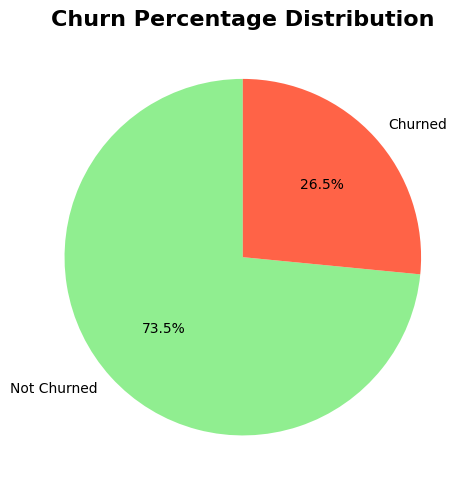

In [760]:
# Churn Distribution in a Pie Chart
plt.figure(figsize=(7, 5))

churn_counts = df['Churn'].value_counts()
colors = ['lightgreen', 'tomato']  # Green, Red

plt.pie(churn_counts, labels=['Not Churned', 'Churned'],
        autopct='%1.1f%%', colors=colors, startangle=90)

plt.title('Churn Percentage Distribution', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('churn_pie_chart.png', dpi=300, bbox_inches='tight')
plt.show()


**Bar chart for Churn distribution**


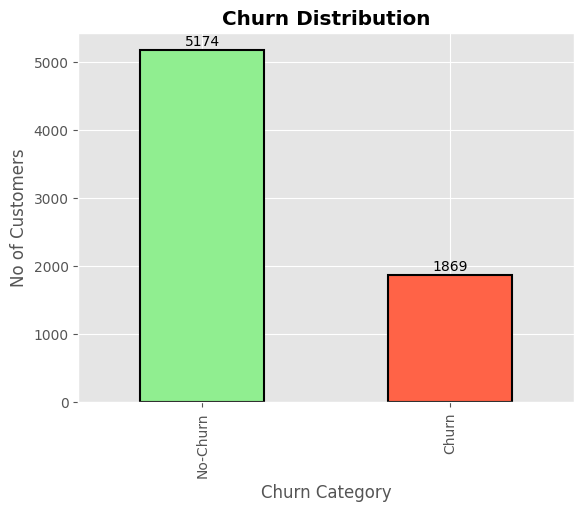

In [761]:
# Bar chart for Churn distribution
counts = df['Churn'].value_counts()
bars = counts.plot(kind='bar', color=['lightgreen', 'tomato'], edgecolor='black', linewidth=1.5)

plt.title("Churn Distribution", fontweight='bold')
plt.xlabel("Churn Category")
plt.ylabel("No of Customers")

# Change x-axis names
plt.xticks([0,1], ['No-Churn', 'Churn'])

# Add value labels
for bar in bars.patches:      # patches = each bar rectangle
    value = bar.get_height()  # height of bar
    x = bar.get_x() + bar.get_width()/2  # center of bar

    plt.text(x, value + 70, str(int(value)), ha='center')

plt.show()



**Histograms & BoxPlots**

*Tenure Distribution Using Histogram & BoxPlot*

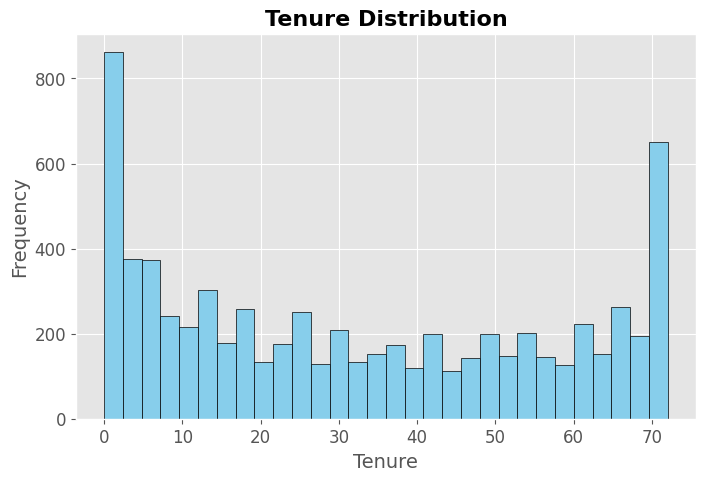

In [762]:
#Tenure Distribution Using Histogram
plt.figure(figsize=(8,5))
df['tenure'].plot(
    kind='hist',
    color='skyblue',
    edgecolor='black',
    bins=30
)

plt.title("Tenure Distribution", fontsize=16, fontweight='bold')
plt.xlabel("Tenure", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


plt.show()


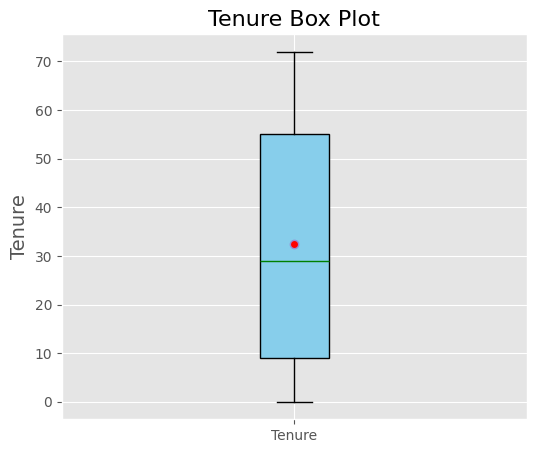

In [763]:
# Box plot for Tenure Statistics Summary
plt.figure(figsize=(6,5))

plt.boxplot(
    df['tenure'],
    patch_artist=True,
    showmeans=True,
    meanprops=dict(marker='o', markerfacecolor='Red'), # mean
    boxprops=dict(facecolor='Skyblue', color='Black'),
    medianprops=dict(color='Green'), # median
    whiskerprops=dict(color='Black'),
    capprops=dict(color='Black')
)

plt.title("Tenure Box Plot", fontsize=16)
plt.ylabel("Tenure", fontsize=14)
plt.xticks([1], ["Tenure"])
plt.grid(True)

plt.show()

*Monthly Charges Distribution Using Histogram & BoxPlot*

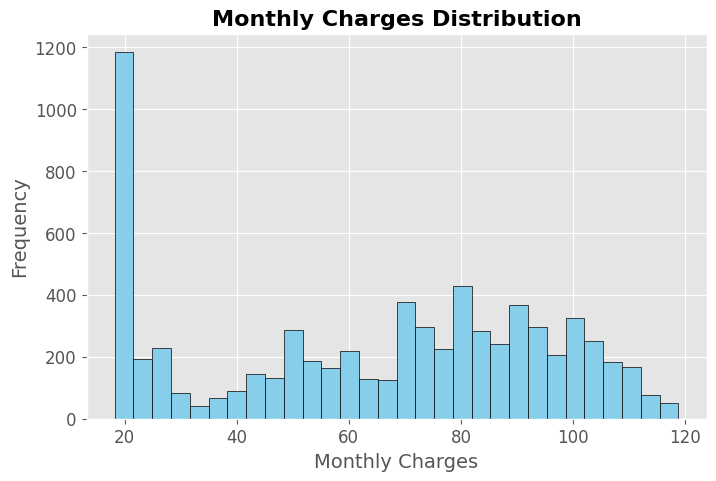

In [764]:
# Monthly Charges Distribution in Histogram
plt.figure(figsize=(8,5))
df['MonthlyCharges'].plot(
    kind='hist',
    color='skyblue',
    edgecolor='black',
    bins= 30
)

plt.title("Monthly Charges Distribution", fontsize=16, fontweight = 'bold')
plt.xlabel("Monthly Charges", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()



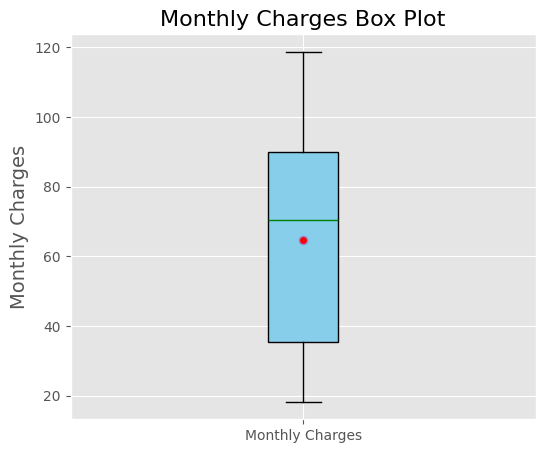

In [765]:
# Box plot for Monthly Charges Statistics Summary
plt.figure(figsize=(6,5))

plt.boxplot(
    df['MonthlyCharges'],
    patch_artist=True,
    showmeans=True,
    meanprops=dict(marker='o', markerfacecolor='Red'), # mean
    boxprops=dict(facecolor='Skyblue', color='Black'),
    medianprops=dict(color='Green'), # median
    whiskerprops=dict(color='Black'),
    capprops=dict(color='Black')
)

plt.title("Monthly Charges Box Plot", fontsize=16)
plt.ylabel("Monthly Charges", fontsize=14)
plt.xticks([1], ["Monthly Charges"])

plt.show()

*Total Charges Distribution Using Histogram & BoxPlot*

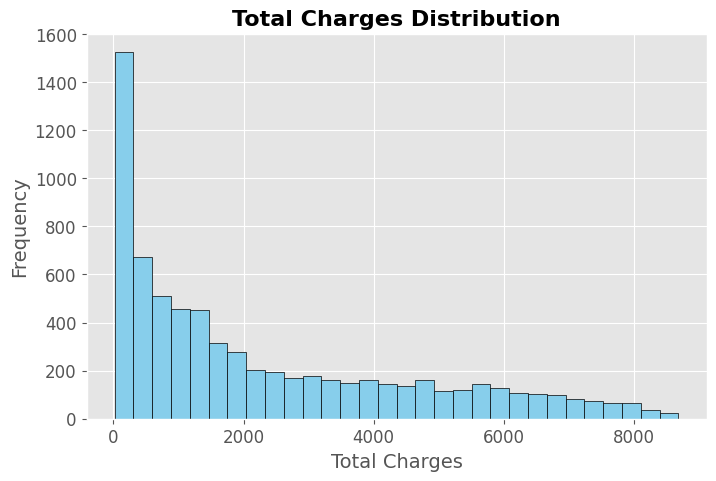

In [766]:
#Total Charges Distribution in Histogram
plt.figure(figsize=(8,5))
df['TotalCharges'].plot(
    kind='hist',
    color='skyblue',
    edgecolor='black',
    bins= 30
)

plt.title("Total Charges Distribution", fontsize=16, fontweight = 'bold')
plt.xlabel("Total Charges", fontsize=14)
plt.ylabel("Frequency", fontsize=14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()


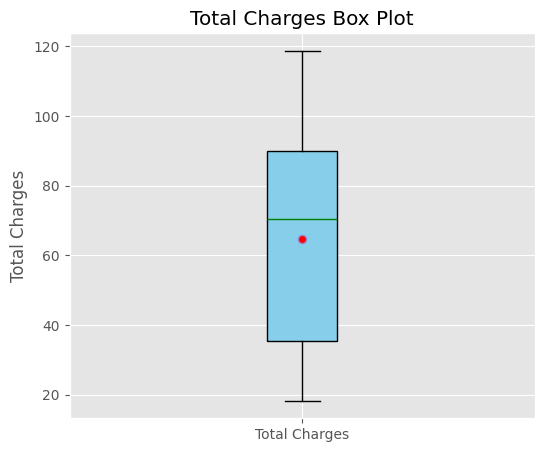

In [767]:
# Box plot for Total Charges Statistics Summary
plt.figure(figsize=(6,5))

plt.boxplot(
    df['MonthlyCharges'],
    patch_artist=True,
    showmeans=True,
    meanprops=dict(marker='o', markerfacecolor='Red'), # mean
    boxprops=dict(facecolor='Skyblue', color='Black'),
    medianprops=dict(color='Green'), # median
    whiskerprops=dict(color='Black'),
    capprops=dict(color='Black')
)

plt.title("Total Charges Box Plot")
plt.ylabel("Total Charges")
plt.xticks([1], ["Total Charges"])
plt.show()

**CountPlots**

*CountPlots for the Contract Types*

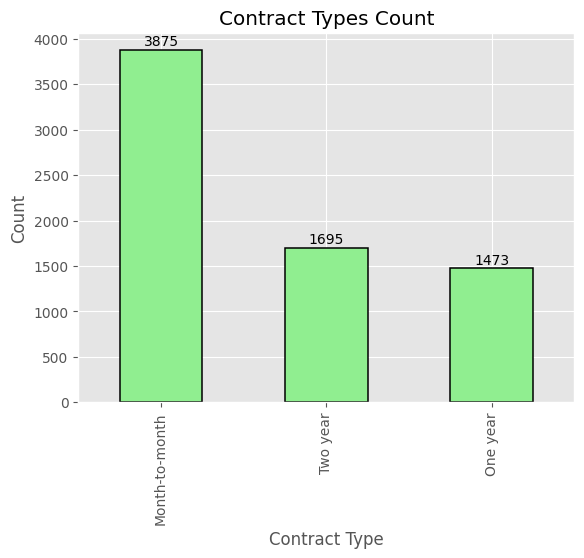

In [768]:
# CountPlots for the Contract Types
contractCounts = df['Contract'].value_counts()
bars = contractCounts.plot(kind='bar', color = 'lightgreen', linewidth = 1.1, edgecolor = 'black')
plt.title("Contract Types Count")
plt.xlabel("Contract Type")
plt.ylabel("Count")

# Add value labels
for bar in bars.patches:      # patches = each bar rectangle
    value = bar.get_height()  # height of bar
    x = bar.get_x() + bar.get_width()/2  # center of bar

    plt.text(x, value + 50, str(int(value)), ha='center')

plt.show()

*CountPlots for the Payment Method*

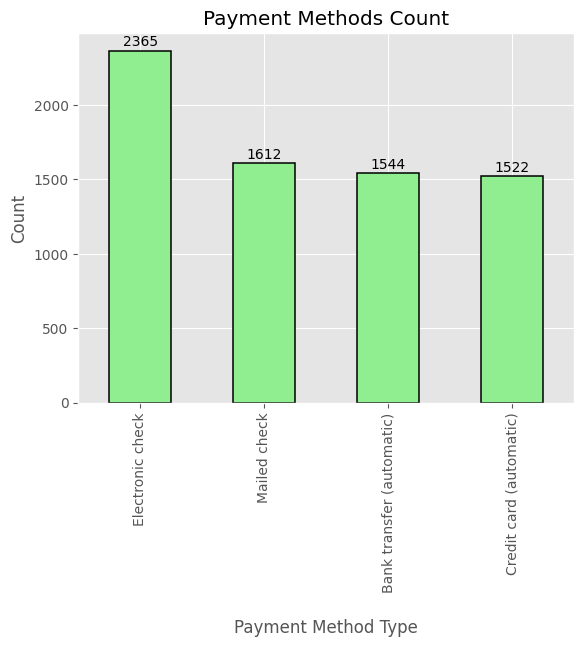

In [769]:
# CountPlots for the Payment Method
contractCounts = df['PaymentMethod'].value_counts()
bars = contractCounts.plot(kind='bar', color = 'lightgreen', linewidth = 1.1, edgecolor = 'black')
plt.title("Payment Methods Count")
plt.xlabel("\nPayment Method Type")
plt.ylabel("Count")

# Add value labels
for bar in bars.patches:      # patches = each bar rectangle
    value = bar.get_height()  # height of bar
    x = bar.get_x() + bar.get_width()/2  # center of bar

    plt.text(x, value + 30, str(int(value)), ha='center')

plt.show()

*CountPlots for the Internet Method*

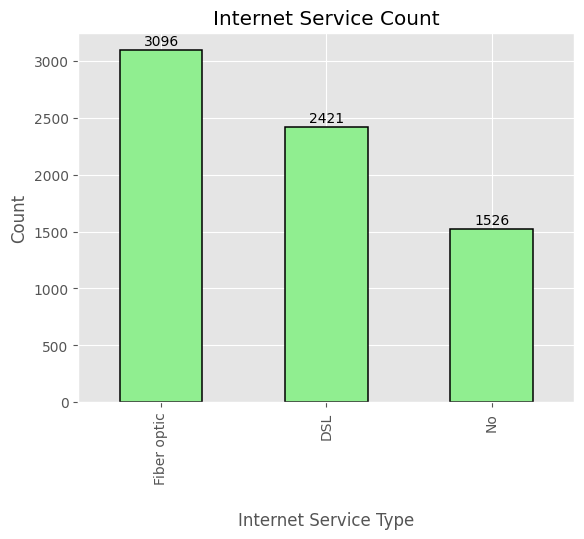

In [770]:
# CountPlots for the Internet Method
contractCounts = df['InternetService'].value_counts()
bars = contractCounts.plot(kind='bar', color = 'lightgreen', linewidth = 1.1, edgecolor = 'black')
plt.title("Internet Service Count")
plt.xlabel("\nInternet Service Type")
plt.ylabel("Count")

# Add value labels
for bar in bars.patches:      # patches = each bar rectangle
    value = bar.get_height()  # height of bar
    x = bar.get_x() + bar.get_width()/2  # center of bar

    plt.text(x, value + 40, str(int(value)), ha='center')

plt.show()

**KDEPlot**

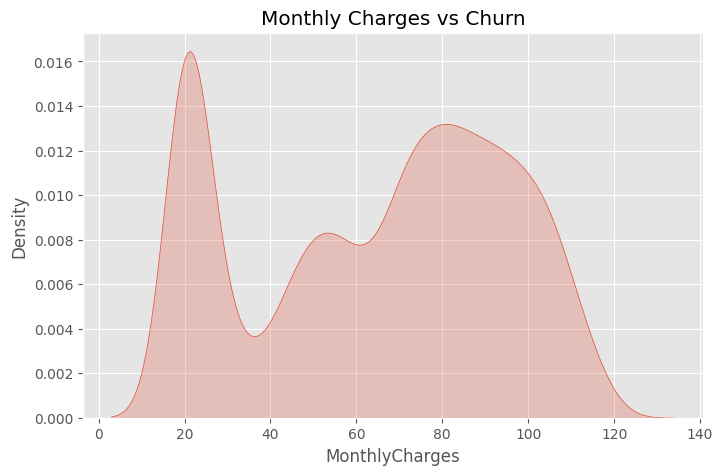

In [771]:
# Monthly Charges vs Churn
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="MonthlyCharges", fill = True)
plt.title("Monthly Charges vs Churn")
plt.show()

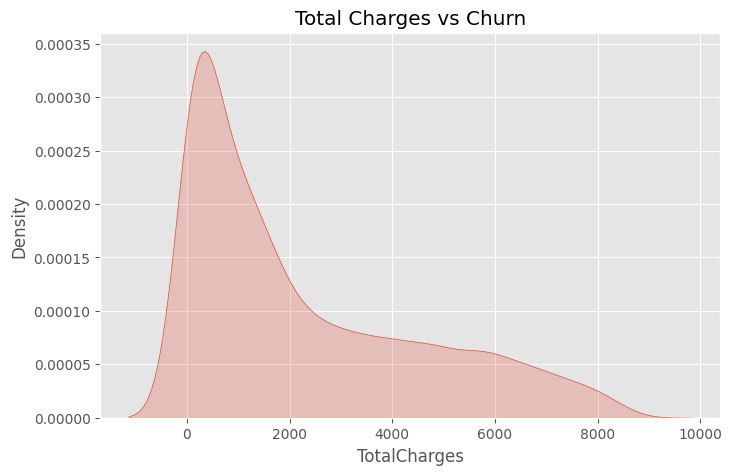

In [772]:
# Total Charges vs Churn
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="TotalCharges", fill = True)
plt.title("Total Charges vs Churn")
plt.show()

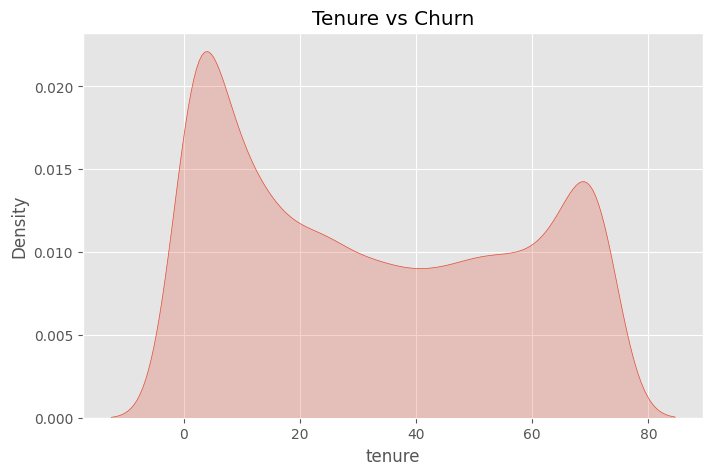

In [773]:
# Tenure vs Churn
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="tenure", fill =  True)
plt.title("Tenure vs Churn")
plt.show()

**Correlation HeatMap**

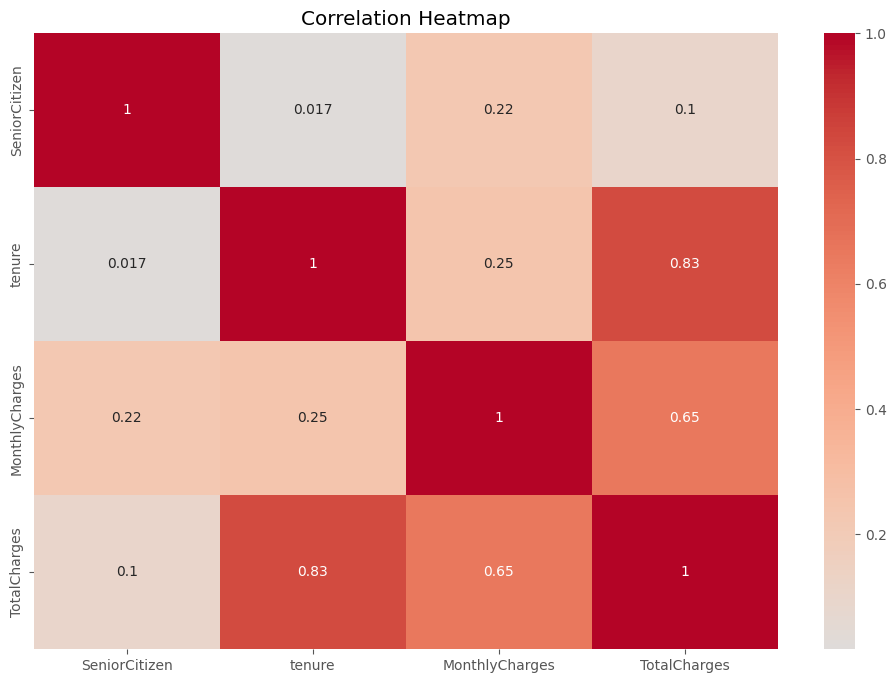

In [774]:
#Correlation Heatmap
# Correlation Heatmap (numeric columns only)
plt.figure(figsize=(12,8))

numeric_df = df.select_dtypes(include=["number"])   # keep numeric columns only
corr_matrix = numeric_df.corr()

sns.heatmap(corr_matrix, cmap="coolwarm", center=0, annot=True)
plt.title("Correlation Heatmap")
plt.show()

**Encoding applied for churn**

**BarPlots For Churn Rate By Groups**

*Churn Rate By Gender*

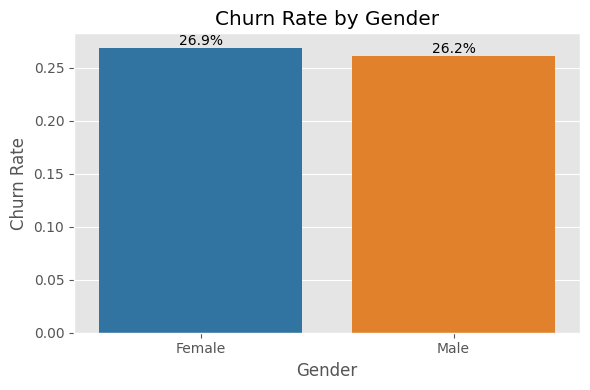

In [775]:
# Churn Rate By Gender
churn_by_gender = df.groupby("gender")["Churn"].value_counts(normalize=True).unstack()

plt.figure(figsize=(6,4))

# Plot only the "Yes" churn rate
ax = sns.barplot(
    x=churn_by_gender.index,
    y=churn_by_gender["Yes"],
    hue=churn_by_gender.index,
    palette=["#1f77b4", "#ff7f0e"]
)

plt.title("Churn Rate by Gender")
plt.ylabel("Churn Rate")
plt.xlabel("Gender")

# ---- ADD PERCENTAGE LABELS ----
for p in ax.patches:
    value = p.get_height()
    ax.annotate(
        f"{value*100:.1f}%",
        (p.get_x() + p.get_width() / 2, value),
        ha='center', va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

*Churn Rate By Contract Type*

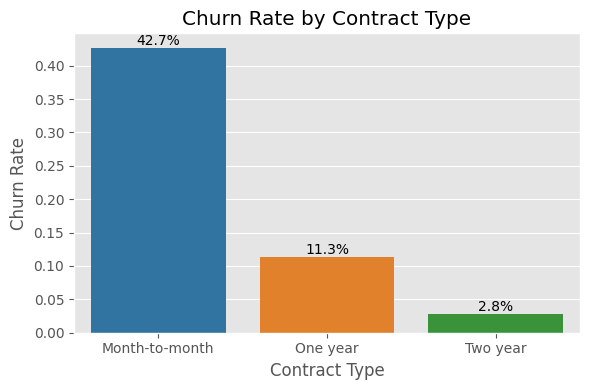

In [776]:
# Churn Rate By Contract Type
churn_by_contract = df.groupby("Contract")["Churn"].value_counts(normalize=True).unstack()

plt.figure(figsize=(6,4))
ax = sns.barplot(
    x=churn_by_contract.index,
    y=churn_by_contract["Yes"],
    hue=churn_by_contract.index,
    palette=["#1f77b4", "#ff7f0e", "#2ca02c"]
)

plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.xlabel("Contract Type")

# Percentage of churn rate by contract types
for p in ax.patches:
    value = p.get_height()
    ax.annotate(
        f"{value*100:.1f}%",              # format as percentage
        (p.get_x() + p.get_width() / 2, value),
        ha='center', va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

*Churn Rate By Payment Method*

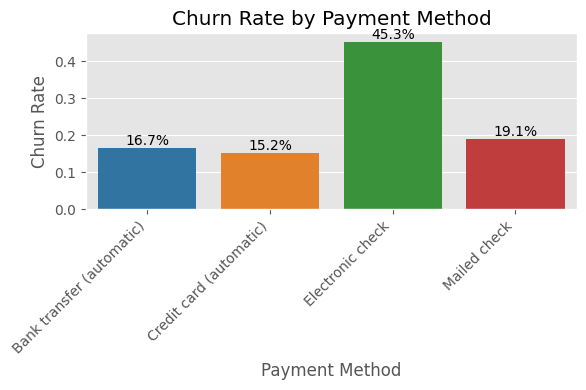

In [777]:
# Churn Rate By Payment Method
churn_by_paymentMethod = df.groupby("PaymentMethod")["Churn"].value_counts(normalize=True).unstack()

plt.figure(figsize=(6,4))
ax = sns.barplot(
    x=churn_by_paymentMethod.index,
    y=churn_by_paymentMethod["Yes"],
    hue=churn_by_paymentMethod.index,
    palette=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]   # 4 colors for 4 categories
)

plt.title("Churn Rate by Payment Method")
plt.ylabel("Churn Rate")
plt.xlabel("Payment Method")

# ---- ADD PERCENTAGE LABELS ----
for p in ax.patches:
    value = p.get_height()
    ax.annotate(
        f"{value*100:.1f}%",
        (p.get_x() + p.get_width() / 2, value),
        ha='center', va='bottom',
        fontsize=10
    )

# ---- FIX LONG TICK LABELS ----
plt.xticks(rotation=45, ha='right')

# ---- Remove duplicate legend ----
legend = plt.gca().get_legend()
if legend is not None:
    legend.remove()

plt.tight_layout()
plt.show()

*Churn Rate By Internet Service*

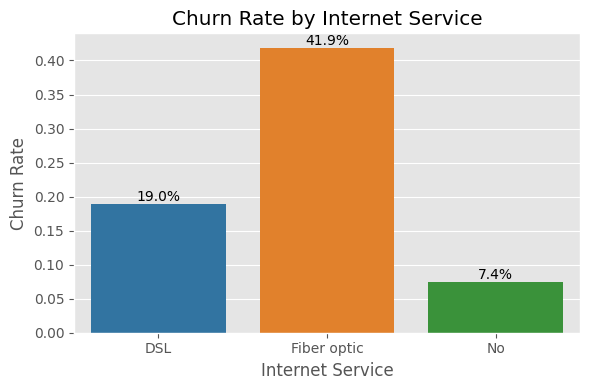

In [778]:
# Churn Rate By Internet Service
churn_by_internet = df.groupby("InternetService")["Churn"].value_counts(normalize=True).unstack()

plt.figure(figsize=(6,4))
ax = sns.barplot(
    x=churn_by_internet.index,
    y=churn_by_internet["Yes"],
    hue=churn_by_internet.index,
    palette=["#1f77b4", "#ff7f0e", "#2ca02c"]
)

plt.title("Churn Rate by Internet Service")
plt.ylabel("Churn Rate")
plt.xlabel("Internet Service")

# ---- ADD PERCENTAGE LABELS ----
for p in ax.patches:
    value = p.get_height()
    ax.annotate(
        f"{value*100:.1f}%",                  # convert to %
        (p.get_x() + p.get_width() / 2, value),
        ha='center', va='bottom',
        fontsize=10
    )

plt.tight_layout()
plt.show()

KEY INSIGHTS:
  1. Contracts that are month-to-month experience the HIGHEST churn rate.
  2. Users of fiber optic services exhibit higher churn compared to DSL users.
  3. The electronic check payment option correlates with increased churn rates.
  4. Churn rates are slightly higher among female users compared to male users, indicating a small gender difference in customer attrition.

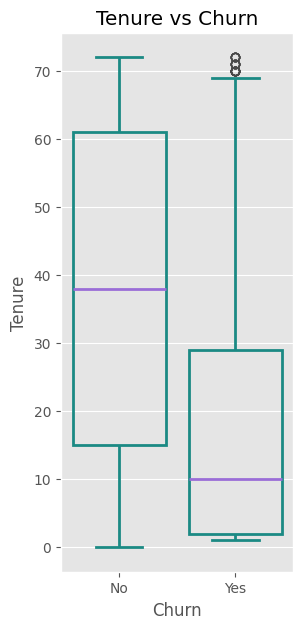

In [779]:
# Tenure vs Churn boxplot
plt.figure(figsize=(3,7))
sns.boxplot(
    data=df,
    x="Churn",
    y="tenure",
    hue="Churn",
    order=["No", "Yes"],
    legend=False,
    boxprops=dict(facecolor="none", edgecolor="#1B8A84", linewidth=2),  # outline color
    whiskerprops=dict(color="#1B8A84", linewidth=2),
    capprops=dict(color="#1B8A84", linewidth=2),
    medianprops=dict(color="#9A6DD7", linewidth=2)  # median line color
)
plt.title("Tenure vs Churn")
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.show()

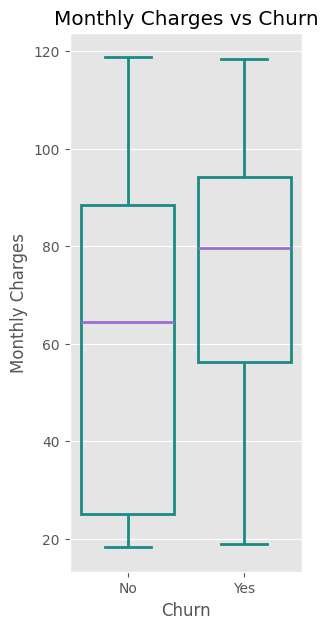

In [780]:
# Monthly Charges vs Churn boxplot
plt.figure(figsize=(3,7))
sns.boxplot(
    data=df,
    x="Churn",
    y="MonthlyCharges",
    hue="Churn",
    order=["No", "Yes"],
    legend=False,
    boxprops=dict(facecolor="none", edgecolor="#1B8A84", linewidth=2), #outline
    whiskerprops=dict(color="#1B8A84", linewidth=2),
    capprops=dict(color="#1B8A84", linewidth=2),
    medianprops=dict(color="#9A6DD7", linewidth=2),   # median
)
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")
plt.show()

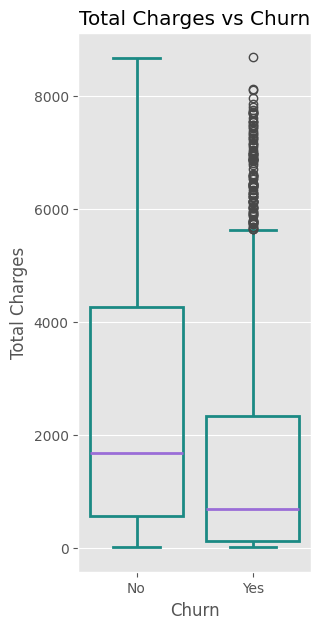

In [781]:
plt.figure(figsize=(3,7))
sns.boxplot(
    data=df,
    x="Churn",
    y="TotalCharges",
    hue="Churn",
    order=["No", "Yes"],
    legend=False,
    boxprops=dict(facecolor="none", edgecolor="#1B8A84", linewidth=2),  # outline color
    whiskerprops=dict(color="#1B8A84", linewidth=2),
    capprops=dict(color="#1B8A84", linewidth=2),
    medianprops=dict(color="#9A6DD7", linewidth=2)  # median line color
)
plt.title("Total Charges vs Churn")
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.show()

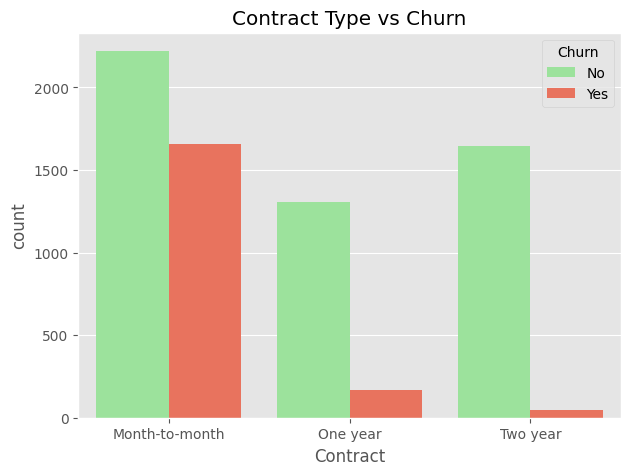

In [782]:
# contract type vs churn
plt.figure(figsize=(7,5))
sns.countplot(data=df,
              x="Contract",
              hue="Churn",
              hue_order=["No", "Yes"],
              palette=["lightgreen", "tomato"])
plt.title("Contract Type vs Churn")
plt.show()

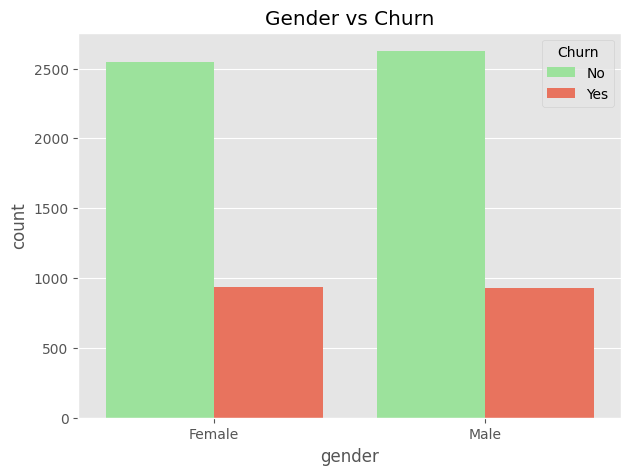

In [783]:
# gender vs churn
plt.figure(figsize=(7,5))
sns.countplot(
    data=df,
    x="gender",
    hue="Churn",
    hue_order=["No", "Yes"],
    palette=["lightgreen", "tomato"]
)
plt.title("Gender vs Churn")
plt.show()

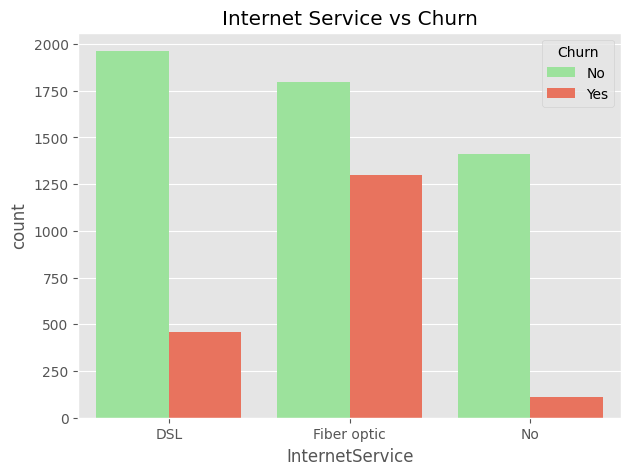

In [784]:
# Internet Service vs churn
plt.figure(figsize=(7,5))
sns.countplot(
    data=df,
    x="InternetService",
    hue="Churn",
    hue_order=["No", "Yes"],
    palette=["lightgreen", "tomato"]
)
plt.title("Internet Service vs Churn")
plt.show()

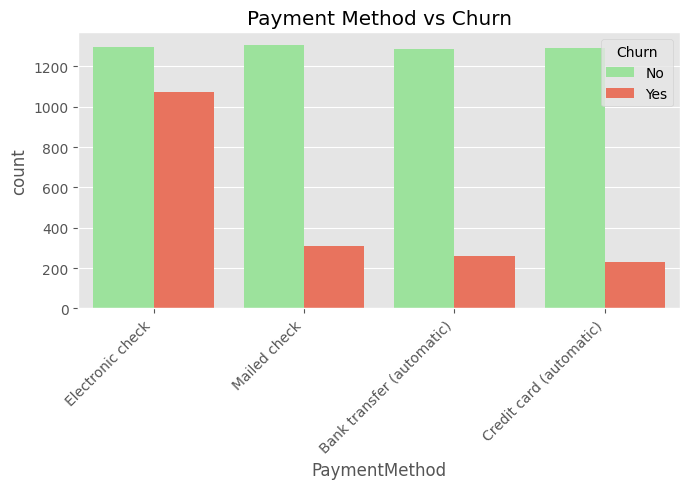

In [785]:
plt.figure(figsize=(7,5))
sns.countplot(
    data=df,
    x="PaymentMethod",
    hue="Churn",
    hue_order=["No", "Yes"],
    palette=["lightgreen", "tomato"]
)

plt.title("Payment Method vs Churn")
plt.xticks(rotation=45, ha="right")   # Fix overlapping labels
plt.tight_layout()                    # Adjust layout
plt.show()

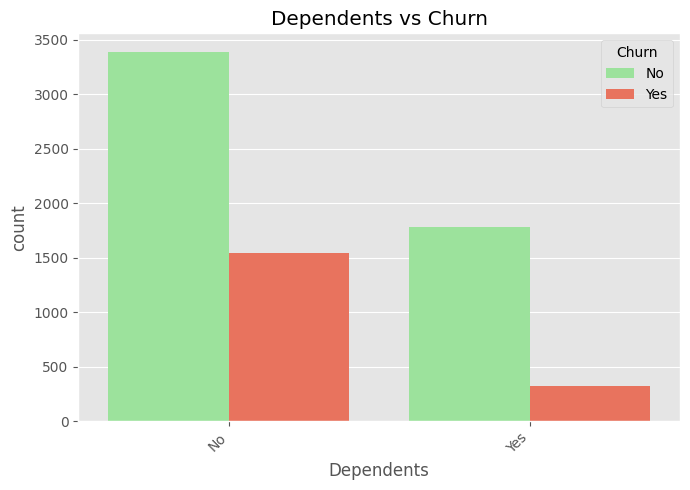

In [786]:
plt.figure(figsize=(7,5))
sns.countplot(
    data=df,
    x="Dependents",
    hue="Churn",
    hue_order=["No", "Yes"],
    palette=["lightgreen", "tomato"]
)
plt.title("Dependents vs Churn")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

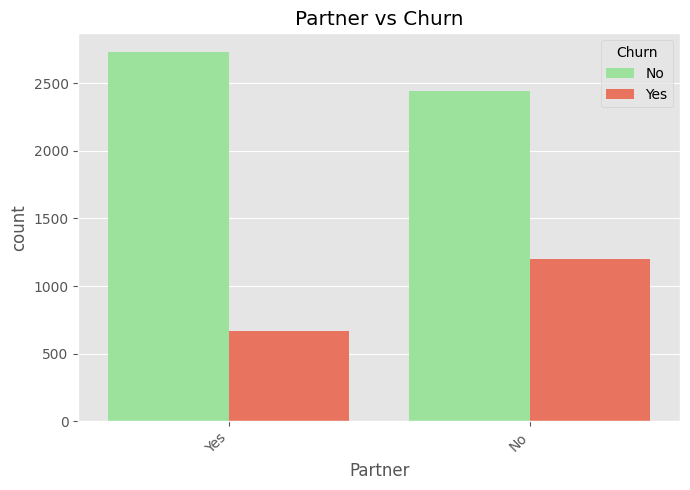

In [787]:
plt.figure(figsize=(7,5))
sns.countplot(
    data=df,
    x="Partner",
    hue="Churn",
    hue_order=["No", "Yes"],
    palette=["lightgreen", "tomato"]
)

plt.title("Partner vs Churn")
plt.xticks(rotation=45, ha="right")   # Fix overlapping labels
plt.tight_layout()                    # Adjust layout
plt.show()

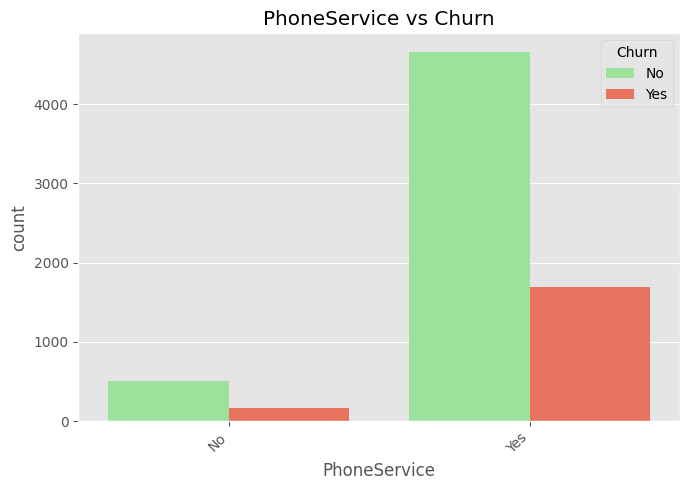

In [788]:
plt.figure(figsize=(7,5))
sns.countplot(
    data=df,
    x="PhoneService",
    hue="Churn",
    hue_order=["No", "Yes"],
    palette=["lightgreen", "tomato"]
)

plt.title("PhoneService vs Churn")
plt.xticks(rotation=45, ha="right")   # Fix overlapping labels
plt.tight_layout()                    # Adjust layout
plt.show()

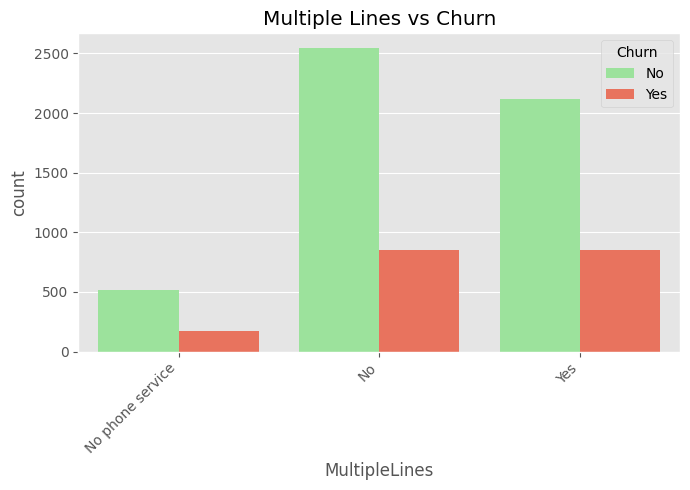

In [789]:
plt.figure(figsize=(7,5))
sns.countplot(
    data=df,
    x="MultipleLines",
    hue="Churn",
    hue_order=["No", "Yes"],
    palette=["lightgreen", "tomato"]
)

plt.title("Multiple Lines vs Churn")
plt.xticks(rotation=45, ha="right")   # Fix overlapping labels
plt.tight_layout()                    # Adjust layout
plt.show()

## --- EDA Summary - Extract Insights ---


In [790]:
print("\n" + "="*80)
print("KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS")
print("="*80)

insights = [
    "1. CLASS IMBALANCE: 73.5% No Churn, 26.5% Churn - A stratified split is necessary.",
    "2. TENURE: Shorter tenure (less than 12 months) is strongly linked to churn.",
    "3. CONTRACT TYPE: Month-to-month agreements exhibit the highest churn rate (approximately 42%).",
    "4. INTERNET SERVICE: Users with fiber optic connections experience churn rates twice as high as those with DSL.",
    "5. PAYMENT METHOD: Customers using electronic checks tend to have a higher churn rate (around 45%).",
    "6. MONTHLY CHARGES: Increased charges are associated with a rise in churn.",
    "7. SERVICES: Customers lacking additional services (such as Online Security and Tech Support) have higher churn rates.",
    "8. MISSING DATA: The TotalCharges variable has 11 missing entries, requiring imputation."
]

print("\n".join(insights))

print("="*80)
print("TASK 1 COMPLETE - EDA DONE!")
print("="*80)



KEY INSIGHTS FROM EXPLORATORY DATA ANALYSIS
1. CLASS IMBALANCE: 73.5% No Churn, 26.5% Churn - A stratified split is necessary.
2. TENURE: Shorter tenure (less than 12 months) is strongly linked to churn.
3. CONTRACT TYPE: Month-to-month agreements exhibit the highest churn rate (approximately 42%).
4. INTERNET SERVICE: Users with fiber optic connections experience churn rates twice as high as those with DSL.
5. PAYMENT METHOD: Customers using electronic checks tend to have a higher churn rate (around 45%).
6. MONTHLY CHARGES: Increased charges are associated with a rise in churn.
7. SERVICES: Customers lacking additional services (such as Online Security and Tech Support) have higher churn rates.
8. MISSING DATA: The TotalCharges variable has 11 missing entries, requiring imputation.
TASK 1 COMPLETE - EDA DONE!


# **Task 2  - Model Implementation**

### Part 1 - Data Preprocessing



**Handle Missing values**

Check Missing Values

In [791]:
print("\n" + "="*80)
print("TASK 2 - PART 1: DATA PREPROCESSING")
print("="*80)

print("\n1. HANDLING MISSING DATA VALUES")
print("-"*80)

# Convert TotalCharges to numeric and check missing
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
missing_count = df['TotalCharges'].isnull().sum()

print(f"Missing values in TotalCharges: {missing_count}")

# Impute with median
median_value = df['TotalCharges'].median()
df['TotalCharges'] = df['TotalCharges'].fillna(median_value)

print(f"Imputed with median: {median_value:.2f}")
print(f"Remaining missing values: {df['TotalCharges'].isnull().sum()}")



TASK 2 - PART 1: DATA PREPROCESSING

1. HANDLING MISSING DATA VALUES
--------------------------------------------------------------------------------
Missing values in TotalCharges: 11
Imputed with median: 1397.47
Remaining missing values: 0


Drop Non-Predictive Features

In [792]:
print("\n2. REMOVING NON-PREDICTIVE FEATURES")
print("-"*80)

# Create a copy for processed dataframe
df_Main = df.copy()

# Remove Custommer ID from the dataframe
df_Main = df_Main.drop(['customerID'], axis=1)

print(f"Dropped customerID")
print(f"Remaining columns: {df_Main.shape[1]}")
print(f"Features: {list(df_Main.columns)}")


2. REMOVING NON-PREDICTIVE FEATURES
--------------------------------------------------------------------------------
Dropped customerID
Remaining columns: 20
Features: ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


**Identify categorical & numerical columns**

In [793]:
# Identify categorical & numerical columns
categorical_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

numeric_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

# Create preprocessors
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
numeric_transformer = StandardScaler()

# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)


**Encode Target Variable**

In [794]:
print("\n3. ENCODING TARGET VARIABLE")
print("-" * 80)

# If already numeric, DO NOT encode again
if df_Main['Churn'].dtype != 'object':
    print("Churn column is already encoded. Skipping encoding.")
else:
    df_Main['Churn'] = df_Main['Churn'].str.strip().str.title().map({'No': 0, 'Yes': 1})
    print("Encoding applied.")

print("\nValue counts:")
print(df_Main['Churn'].value_counts())


3. ENCODING TARGET VARIABLE
--------------------------------------------------------------------------------
Encoding applied.

Value counts:
Churn
0    5174
1    1869
Name: count, dtype: int64


**Encode Categorical Variables**

In [795]:
print("\n4. ENCODING CATEGORICAL FEATURES\n")
print("-" * 80)

# 1. Encode simple Yes/No columns
binary_columns = ['gender', 'Partner', 'Dependents',
                  'PhoneService', 'PaperlessBilling']

print("Binary Encoding:")
for col in binary_columns:
    if col in df_Main.columns:
        df_Main[col] = df_Main[col].replace({
            'Yes': 1, 'No': 0,
            'Male': 1, 'Female': 0
        })
        print(f"  Encoded: {col}")

print("  SeniorCitizen (already numeric)\n")

# 2. One-Hot Encoding for multi-class columns
multi_value_cols = [
    'MultipleLines', 'InternetService', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod'
]

print("\nOne-Hot Encoding:")
df_Final = pd.get_dummies(df_Main, columns=multi_value_cols, drop_first=True)

print(f"  One-hot encoded {len(multi_value_cols)} columns\n\n")

print("\nShape after encoding:", df_Final.shape)
print("Total feature columns (excluding Churn):", df_Final.shape[1] - 1)



4. ENCODING CATEGORICAL FEATURES

--------------------------------------------------------------------------------
Binary Encoding:
  Encoded: gender
  Encoded: Partner
  Encoded: Dependents
  Encoded: PhoneService
  Encoded: PaperlessBilling
  SeniorCitizen (already numeric)


One-Hot Encoding:
  One-hot encoded 10 columns



Shape after encoding: (7043, 31)
Total feature columns (excluding Churn): 30


/tmp/ipython-input-2708912134.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_Main[col] = df_Main[col].replace({


In [796]:
# Right before train_test_split, verify:
print("\nBefore split - checking y:")
print(f"y dtype: {y.dtype}")
print(f"y unique values: {y.unique()}")
print(f"y value counts:\n{y.value_counts()}")


Before split - checking y:
y dtype: int64
y unique values: [0 1]
y value counts:
Churn
0    5174
1    1869
Name: count, dtype: int64


**Split Features and Target**

In [797]:
print("\n5. FEATURE & TARGET SPLIT")
print("-" * 100)

# Split data - USE df_Final (the encoded dataframe)
X = df_Final.drop('Churn', axis=1)
y = df_Final['Churn']

print(f"Data Dimensions:")
print(f"Input variables: {X.shape}")
print(f"Output variable: {y.shape}")
print(f"\nSample Features (first 10):")
print(f"   {', '.join(X.columns[:10])}...")

# Verify encoding worked
print(f"\nVerifying Churn encoding:")
print(f"y dtype: {y.dtype}")
print(f"y unique values: {y.unique()}")

# Class distribution
retain = (y == 0).sum()
leave = (y == 1).sum()
n = len(y)

print(f"\nClass Balance:")
print(f"Retained customers: {retain:,} ({retain/n*100:.1f}%)")
print(f"Churned customers:  {leave:,} ({leave/n*100:.1f}%)")


5. FEATURE & TARGET SPLIT
----------------------------------------------------------------------------------------------------
Data Dimensions:
Input variables: (7043, 30)
Output variable: (7043,)

Sample Features (first 10):
   gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, PaperlessBilling, MonthlyCharges, TotalCharges, MultipleLines_No phone service...

Verifying Churn encoding:
y dtype: int64
y unique values: [0 1]

Class Balance:
Retained customers: 5,174 (73.5%)
Churned customers:  1,869 (26.5%)


**Train-Test Split**

In [798]:
print("\n6. Train-test split")
print("-" * 80)

# REMOVED THE OLD SPLIT USING df - NOW USE X and y from df_Final
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

total = len(X)
train_size = len(X_train)
test_size = len(X_test)

print(f"Dataset Division:")
print(f"Training: {train_size:,} records ({train_size/total*100:.1f}%)")
print(f"Testing:  {test_size:,} records ({test_size/total*100:.1f}%)")

# Calculate class ratios
train_retained = (y_train == 0).sum()
train_churned = (y_train == 1).sum()
test_retained = (y_test == 0).sum()
test_churned = (y_test == 1).sum()

print(f"\nTraining Set Composition:")
print(f"No Churn: {train_retained:,} ({train_retained/train_size*100:.2f}%)")
print(f"Churn:   {train_churned:,} ({train_churned/train_size*100:.2f}%)")

print(f"\nTesting Set Composition:")
print(f"No Churn: {test_retained:,} ({test_retained/test_size*100:.2f}%)")
print(f"Churn:   {test_churned:,} ({test_churned/test_size*100:.2f}%)")

print("\nProportional split achieved!")


6. Train-test split
--------------------------------------------------------------------------------
Dataset Division:
Training: 5,634 records (80.0%)
Testing:  1,409 records (20.0%)

Training Set Composition:
No Churn: 4,139 (73.46%)
Churn:   1,495 (26.54%)

Testing Set Composition:
No Churn: 1,035 (73.46%)
Churn:   374 (26.54%)

Proportional split achieved!


**Feature Scalling**

In [799]:
print("\n7. DATA NORMALIZATION")
print("-" * 100)

# Define numeric columns for scaling
num_cols = ["tenure", "MonthlyCharges", "TotalCharges"]

# Initialize scaler
scaler = StandardScaler()

# Scale only numeric columns
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test_scaled[num_cols] = scaler.transform(X_test[num_cols])

print("Z-score normalization applied: z = (x - mean) / std_dev")
print(f"\nTraining Data Statistics:")
print(f"Average value: {X_train_scaled[num_cols].values.mean():.4f} (target: ~0)")
print(f"Spread (σ):    {X_train_scaled[num_cols].values.std():.4f} (target: ~1)")

print(f"\nTesting Data Statistics:")
print(f"Average value: {X_test_scaled[num_cols].values.mean():.4f}")
print(f"Spread (σ):    {X_test_scaled[num_cols].values.std():.4f}")

print(f"\nNormalized columns: {', '.join(num_cols)}")
print("Normalization completed successfully!")



7. DATA NORMALIZATION
----------------------------------------------------------------------------------------------------
Z-score normalization applied: z = (x - mean) / std_dev

Training Data Statistics:
Average value: -0.0000 (target: ~0)
Spread (σ):    1.0000 (target: ~1)

Testing Data Statistics:
Average value: -0.0312
Spread (σ):    0.9872

Normalized columns: tenure, MonthlyCharges, TotalCharges
Normalization completed successfully!


**Handle Class Imbalance**

In [800]:
print("\n8. HANDLE CLASS IMBALANCE")
print("-" * 100)

# Calculate and display class distribution
train_retained = (y_train == 0).sum()
train_churned = (y_train == 1).sum()
train_total = len(y_train)

print("Class Distribution in Training Data:")
print(f"Retained (0): {train_retained:,} ({train_retained/train_total*100:.2f}%)")
print(f"Churned (1):  {train_churned:,} ({train_churned/train_total*100:.2f}%)")
print(f"Imbalance Ratio: {train_retained/train_churned:.2f}:1")

# Calculate weights for imbalanced classes
weights = compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)

weight_map = {0: weights[0], 1: weights[1]}

print("\nComputed Weights:")
print(f"Retained (0): {weights[0]:.4f}")
print(f"Churned (1):  {weights[1]:.4f}")
print(f"\nMinority class receives {weights[1]/weights[0]:.2f}x boost")

print("\n" + "=" * 100)
print("DATA PREPARATION FINISHED!")
print("=" * 100)
print(f"Model-Ready Summary:")
print(f"   + Train records: {X_train_scaled.shape[0]:,}")
print(f"   + Test records:  {X_test_scaled.shape[0]:,}")
print(f"   + Total features: {X_train_scaled.shape[1]}")
print(f"   + Weight balancing: Done")
print(f"   + Normalization: Done")
print("=" * 100)


8. HANDLE CLASS IMBALANCE
----------------------------------------------------------------------------------------------------
Class Distribution in Training Data:
Retained (0): 4,139 (73.46%)
Churned (1):  1,495 (26.54%)
Imbalance Ratio: 2.77:1

Computed Weights:
Retained (0): 0.6806
Churned (1):  1.8843

Minority class receives 2.77x boost

DATA PREPARATION FINISHED!
Model-Ready Summary:
   + Train records: 5,634
   + Test records:  1,409
   + Total features: 30
   + Weight balancing: Done
   + Normalization: Done


### Part 2 - Decision Tree


**Baseline Decision Tree**

In [801]:
print("\n" + "=" * 100)
print("DATA PREPARATION FINISHED!")
print("=" * 100)
print(f"Model-Ready Summary:")
print(f"   + Train records: {X_train_scaled.shape[0]:,}")
print(f"   + Test records:  {X_test_scaled.shape[0]:,}")
print(f"   + Total features: {X_train_scaled.shape[1]}")
print(f"   + Weight balancing: Done")
print(f"   + Normalization: Done")
print("=" * 100)

# MODEL TRAINING
baseline_dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Train on scaled data
baseline_dt.fit(X_train_scaled, y_train)
y_pred_base = baseline_dt.predict(X_test_scaled)

print("\nBaseline Decision Tree (No tuning):")
print(classification_report(y_test, y_pred_base))

base_recall = recall_score(y_test, y_pred_base, pos_label=1)
base_f1 = f1_score(y_test, y_pred_base, pos_label=1)

print(f"\nRecall: {base_recall:.4f}")
print(f"F1 Score: {base_f1:.4f}")


DATA PREPARATION FINISHED!
Model-Ready Summary:
   + Train records: 5,634
   + Test records:  1,409
   + Total features: 30
   + Weight balancing: Done
   + Normalization: Done

Baseline Decision Tree (No tuning):
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1035
           1       0.49      0.49      0.49       374

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409


Recall: 0.4866
F1 Score: 0.4873


**Hyperparameter Tuning**

In [802]:
print("\n" + "=" * 75)
print("GRID SEARCH WITH CONSTRAINED PARAMETERS")
print("=" * 75)

# No pipeline needed - data is already preprocessed!
# UNDERTUNED PARAMETER GRID - Much more restrictive
param_grid = {
    'max_depth': [3, 5],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [10, 20],
    'max_features': ['sqrt'],
    'splitter': ['best'],
    'min_samples_split': [20, 30]
}

print("\nConstrained Parameter Grid:")
print(f"  - max_depth: {param_grid['max_depth']} (shallow only)")
print(f"  - criterion: {param_grid['criterion']}")
print(f"  - min_samples_leaf: {param_grid['min_samples_leaf']} (high values)")
print(f"  - max_features: {param_grid['max_features']} (sqrt only)")
print(f"  - min_samples_split: {param_grid['min_samples_split']} (restrictive)")

dt_grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

print("\nRunning GridSearchCV with constrained parameters...")
start = time.time()
dt_grid.fit(X_train_scaled, y_train)  # Use X_train_scaled (your preprocessed data)
dt_train_time = time.time() - start

print(f"\nDecision Tree Training Time: {dt_train_time:.4f} seconds")
print(f"Best Parameters: {dt_grid.best_params_}")
print(f"Best F1 Score: {dt_grid.best_score_:.4f}")


GRID SEARCH WITH CONSTRAINED PARAMETERS

Constrained Parameter Grid:
  - max_depth: [3, 5] (shallow only)
  - criterion: ['gini', 'entropy']
  - min_samples_leaf: [10, 20] (high values)
  - max_features: ['sqrt'] (sqrt only)
  - min_samples_split: [20, 30] (restrictive)

Running GridSearchCV with constrained parameters...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Decision Tree Training Time: 3.7073 seconds
Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 20, 'min_samples_split': 20, 'splitter': 'best'}
Best F1 Score: 0.5876


In [803]:
print("\nRunning GridSearchCV with undertuned parameters...")
start = time.time()
dt_grid.fit(X_train, y_train)
dt_train_time = time.time() - start

print(f"\nDecision Tree Training Time: {dt_train_time:.4f} seconds")



Running GridSearchCV with undertuned parameters...
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Decision Tree Training Time: 0.9313 seconds


**Evaluate Tuned Model**

In [804]:
# 3. GET BEST MODEL AND PREDICTIONS
best_dt = dt_grid.best_estimator_
y_pred_tuned = best_dt.predict(X_test)
y_prob_tuned = best_dt.predict_proba(X_test)[:, 1]

# 4. CALCULATE METRICS
dt_accuracy = accuracy_score(y_test, y_pred_tuned)
dt_precision = precision_score(y_test, y_pred_tuned)
dt_recall = recall_score(y_test, y_pred_tuned)
dt_f1 = f1_score(y_test, y_pred_tuned)
dt_auc = roc_auc_score(y_test, y_prob_tuned)

tuned_recall = dt_recall
tuned_f1 = dt_f1

print("\n" + "=" * 75)
print("UNDERTUNED DECISION TREE RESULTS")
print("=" * 75)

print("\nBest Parameters Found:")
for param, value in dt_grid.best_params_.items():
    print(f"  {param}: {value}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_tuned))


UNDERTUNED DECISION TREE RESULTS

Best Parameters Found:
  criterion: gini
  max_depth: 5
  max_features: sqrt
  min_samples_leaf: 20
  min_samples_split: 20
  splitter: best

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.73      0.80      1035
           1       0.49      0.71      0.58       374

    accuracy                           0.72      1409
   macro avg       0.68      0.72      0.69      1409
weighted avg       0.77      0.72      0.74      1409



**Comparison of Baseline vs Tuned**



In [805]:
print(f"Baseline Recall: {base_recall:.4f} | Undertuned Recall: {tuned_recall:.4f}")
print(f"Baseline F1    : {base_f1:.4f} | Undertuned F1    : {tuned_f1:.4f}")

Baseline Recall: 0.4866 | Undertuned Recall: 0.7059
Baseline F1    : 0.4873 | Undertuned F1    : 0.5764


In [806]:
# 5. STORE METRICS FOR FINAL COMPARISON
DT_RESULTS = {
    "accuracy": dt_accuracy,
    "precision": dt_precision,
    "recall": dt_recall,
    "f1": dt_f1,
    "auc": dt_auc,
    "training_time": dt_train_time
}

print("\n" + "=" * 75)
print("STORED DECISION TREE RESULTS FOR COMPARISON")
print("=" * 75)
for metric, value in DT_RESULTS.items():
    if metric == "training_time":
        print(f"{metric:15s}: {value:.4f} seconds")
    else:
        print(f"{metric:15s}: {value:.4f}")


STORED DECISION TREE RESULTS FOR COMPARISON
accuracy       : 0.7246
precision      : 0.4871
recall         : 0.7059
f1             : 0.5764
auc            : 0.7886
training_time  : 0.9313 seconds


**Tree Details (Depth + Leaves)**

In [807]:
print("\n" + "=" * 75)
print("TREE STRUCTURE INFORMATION")
print("=" * 75)
print(f"Tree Depth       : {best_dt.get_depth()}")
print(f"Number of Leaves : {best_dt.get_n_leaves()}")
print(f"Total Nodes      : {best_dt.tree_.node_count}")

print("\nDecision Tree training complete!")
print("=" * 75)


TREE STRUCTURE INFORMATION
Tree Depth       : 5
Number of Leaves : 27
Total Nodes      : 53

Decision Tree training complete!


### Part 3 - Neural Network

**Apply Preprocessing & Fix Data Types**

In [808]:
# PREPROCESSING FOR NEURAL NETWORK
print("\nPreparing data for Neural Network...")

# Your data is ALREADY preprocessed and scaled!
# Just convert to numpy arrays
X_train_trans = np.array(X_train_scaled).astype("float32")
X_test_trans = np.array(X_test_scaled).astype("float32")
y_train_np = np.array(y_train).astype("float32")
y_test_np = np.array(y_test).astype("float32")

print("Processed shapes:")
print("X_train:", X_train_trans.shape)
print("X_test :", X_test_trans.shape)

# COMPUTE CLASS WEIGHTS (Important for imbalanced data)
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: class_weights_array[i] for i in range(len(class_weights_array))}
print(f"\nClass weights: {class_weights}")


Preparing data for Neural Network...
Processed shapes:
X_train: (5634, 30)
X_test : (1409, 30)

Class weights: {0: np.float64(0.6805991785455424), 1: np.float64(1.8842809364548494)}


In [809]:
# COMPUTE CLASS WEIGHTS (Important for imbalanced data)
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = {i: class_weights_array[i] for i in range(len(class_weights_array))}
print(f"\nClass weights: {class_weights}")



Class weights: {0: np.float64(0.6805991785455424), 1: np.float64(1.8842809364548494)}


**Build Neural Network Architecture**

In [810]:
# NEURAL NETWORK ARCHITECTURE
print("\nBuilding Highly Tuned Neural Network Architecture...")

input_dim = X_train_trans.shape[1]

model = Sequential([
    Input(shape=(input_dim,)),

    # First block - Wider network to capture complex patterns
    Dense(256, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.5),

    # Second block
    Dense(128, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.4),

    # Third block
    Dense(64, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.3),

    # Fourth block
    Dense(32, activation='relu', kernel_regularizer=l2(0.0001)),
    BatchNormalization(),
    Dropout(0.2),

    # Fifth block - Additional depth
    Dense(16, activation='relu', kernel_regularizer=l2(0.0001)),
    Dropout(0.1),

    # Output layer
    Dense(1, activation='sigmoid')
])



Building Highly Tuned Neural Network Architecture...


**Compile Model**

In [811]:
# COMPILE MODEL

model.compile(
    optimizer=Adam(learning_rate=0.0005, beta_1=0.9, beta_2=0.999),
    loss="binary_crossentropy",
    metrics=["accuracy", "AUC", "Precision", "Recall"]
)

print("\nModel Summary:")
model.summary()
print("\nModel compiled successfully.")



Model Summary:


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                │ (None, 256)            │         7,936 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_30 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_31 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_26          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_32 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_27          │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_33 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_34 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,633 (209.50 KB)

 Trainable params: 52,673 (205.75 KB)

 Non-trainable params: 960 (3.75 KB)


Model compiled successfully.


**Callbacks**

In [812]:
# CALLBACKS
early_stop = EarlyStopping(
    monitor="val_auc",  # Monitor AUC instead of loss
    patience=20,
    restore_best_weights=True,
    verbose=1,
    mode='max'  # Maximize AUC
)

checkpoint = ModelCheckpoint(
    "best_nn_model_optimized.keras",
    monitor="val_auc",
    save_best_only=True,
    verbose=1,
    mode='max'
)

# rate reduction
reduce_lr = ReduceLROnPlateau(
    monitor='val_auc',
    factor=0.3,
    patience=7,
    min_lr=1e-8,
    verbose=1,
    mode='max'
)

print("Callbacks set: EarlyStopping (AUC), ModelCheckpoint, ReduceLROnPlateau")

Callbacks set: EarlyStopping (AUC), ModelCheckpoint, ReduceLROnPlateau


**Train Model**

In [813]:
print("\nTraining Highly Tuned Neural Network...\n")
start = time.time()

history = model.fit(
    X_train_trans,
    y_train_np,
    validation_split=0.15,  # Smaller validation split for more training data
    epochs=150,  # More epochs
    batch_size=32,  # Smaller batch size for better gradient updates
    class_weight=class_weights,
    callbacks=[early_stop, checkpoint, reduce_lr],
    verbose=1
)

nn_train_time = time.time() - start

print(f"\n\nNeural Network Training Time: {nn_train_time:.4f} seconds")


Training Highly Tuned Neural Network...

Epoch 1/150
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - AUC: 0.6612 - Precision: 0.3882 - Recall: 0.4563 - accuracy: 0.6813 - loss: 0.7581 - val_AUC: 0.7703 - val_Precision: 0.2647 - val_Recall: 1.0000 - val_accuracy: 0.2778 - val_loss: 0.9227 - learning_rate: 5.0000e-04
Epoch 2/150
 12/150 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.7776 - Precision: 0.4396 - Recall: 0.7684 - accuracy: 0.6847 - loss: 0.6124 

/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_auc` which is not available. Available metrics are: AUC,Precision,Recall,accuracy,loss,val_AUC,val_Precision,val_Recall,val_accuracy,val_loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/model_checkpoint.py:302: UserWarning: Can save best model only with val_auc available.
  if self._should_save_model(epoch, batch, logs, filepath):
/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/callback_list.py:145: UserWarning: Learning rate reduction is conditioned on metric `val_auc` which is not available. Available metrics are: AUC,Precision,Recall,accuracy,loss,val_AUC,val_Precision,val_Recall,val_accuracy,val_loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.7489 - Precision: 0.4299 - Recall: 0.7274 - accuracy: 0.6760 - loss: 0.6486 - val_AUC: 0.7876 - val_Precision: 0.3253 - val_Recall: 0.9773 - val_accuracy: 0.4669 - val_loss: 0.8301 - learning_rate: 5.0000e-04
Epoch 3/150
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.7993 - Precision: 0.4581 - Recall: 0.7816 - accuracy: 0.7010 - loss: 0.5810 - val_AUC: 0.8028 - val_Precision: 0.3764 - val_Recall: 0.9273 - val_accuracy: 0.5816 - val_loss: 0.7354 - learning_rate: 5.0000e-04
Epoch 4/150
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.7990 - Precision: 0.4621 - Recall: 0.7918 - accuracy: 0.7096 - loss: 0.5811 - val_AUC: 0.8089 - val_Precision: 0.3891 - val_Recall: 0.9091 - val_accuracy: 0.6052 - val_loss: 0.6932 - learning_rate: 5.0000e-04
Epoch 5/150
150/150 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - AUC: 0.8030 - Precision: 0.4648 - Recall: 0.7775 - accuracy: 0.7009 - loss: 0.5826 - val_AUC: 0.8111 - val_Precision: 0.4095 - val_Recall: 0.904

In [814]:
# LOAD BEST MODEL
print("\nLoading best model weights...")
model = tf.keras.models.load_model("best_nn_model_optimized.keras")


Loading best model weights...


**Predict + Evaluation**

In [815]:
print("\nEvaluating Highly Tuned Neural Network...\n")

# Get probability predictions
y_prob_nn = model.predict(X_test_trans).flatten()

# Optimized threshold using validation set (optional)
# You can tune this threshold for better results
threshold = 0.5

# Binary predictions
y_pred_nn = (y_prob_nn > threshold).astype(int)

print("=" * 60)
print("NEURAL NETWORK CLASSIFICATION REPORT")
print("=" * 60)
print(classification_report(y_test_np, y_pred_nn))

# Extract metrics
nn_accuracy = accuracy_score(y_test_np, y_pred_nn)
nn_precision = precision_score(y_test_np, y_pred_nn)
nn_recall = recall_score(y_test_np, y_pred_nn)
nn_f1 = f1_score(y_test_np, y_pred_nn)
nn_auc = roc_auc_score(y_test_np, y_prob_nn)


Evaluating Highly Tuned Neural Network...

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
NEURAL NETWORK CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.88      0.74      0.81      1035
         1.0       0.50      0.72      0.59       374

    accuracy                           0.74      1409
   macro avg       0.69      0.73      0.70      1409
weighted avg       0.78      0.74      0.75      1409



In [816]:
NN_RESULTS = {
    "accuracy": nn_accuracy,
    "precision": nn_precision,
    "recall": nn_recall,
    "f1": nn_f1,
    "auc": nn_auc,
    "training_time": nn_train_time
}

print("\n" + "=" * 60)
print("NEURAL NETWORK RESULTS")
print("=" * 60)
for metric, value in NN_RESULTS.items():
    if metric == "training_time":
        print(f"{metric:15s}: {value:.4f} seconds")
    else:
        print(f"{metric:15s}: {value:.4f}")


NEURAL NETWORK RESULTS
accuracy       : 0.7367
precision      : 0.5028
recall         : 0.7166
f1             : 0.5910
auc            : 0.8172
training_time  : 182.5535 seconds


In [817]:
# =============================================================
# PART B — BUILD COMPARISON TABLE
# =============================================================
print("Starting Step 5: Model Comparison...\n\n")

comparison_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "F1 Score", "AUC", "Training Time (sec)"],
    "Decision Tree": [
        DT_RESULTS["accuracy"],
        DT_RESULTS["precision"],
        DT_RESULTS["recall"],
        DT_RESULTS["f1"],
        DT_RESULTS["auc"],
        DT_RESULTS["training_time"]
    ],
    "Neural Network": [
        NN_RESULTS["accuracy"],
        NN_RESULTS["precision"],
        NN_RESULTS["recall"],
        NN_RESULTS["f1"],
        NN_RESULTS["auc"],
        NN_RESULTS["training_time"]
    ]
})

print("MODEL COMPARISON TABLE\n")
display(comparison_df)


Starting Step 5: Model Comparison...


MODEL COMPARISON TABLE



,Metric,Decision Tree,Neural Network
0,Accuracy,0.724627,0.736693
1,Precision,0.487085,0.502814
2,Recall,0.705882,0.716578
3,F1 Score,0.576419,0.590959
4,AUC,0.788602,0.817159
5,Training Time (sec),0.931322,182.553522


In [818]:
# =============================================================
# PART C — DETERMINE BEST MODEL
# =============================================================

def determine_best_model(dt_results, nn_results):
    """
    Determines the best model based on multiple metrics.
    Uses a weighted scoring system for robustness.
    """
    # Weight important metrics (F1 and AUC are most important for imbalanced data)
    dt_score = (dt_results["f1"] * 0.4 +
                dt_results["auc"] * 0.3 +
                dt_results["accuracy"] * 0.2 +
                dt_results["recall"] * 0.1)

    nn_score = (nn_results["f1"] * 0.4 +
                nn_results["auc"] * 0.3 +
                nn_results["accuracy"] * 0.2 +
                nn_results["recall"] * 0.1)

    # Calculate differences for each metric
    metric_comparison = {
        "accuracy": nn_results["accuracy"] - dt_results["accuracy"],
        "precision": nn_results["precision"] - dt_results["precision"],
        "recall": nn_results["recall"] - dt_results["recall"],
        "f1": nn_results["f1"] - dt_results["f1"],
        "auc": nn_results["auc"] - dt_results["auc"]
    }

    # Determine winner
    if nn_score > dt_score:
        best_model = "Neural Network"
        score_diff = nn_score - dt_score
    elif dt_score > nn_score:
        best_model = "Decision Tree"
        score_diff = dt_score - nn_score
    else:
        best_model = "Tie"
        score_diff = 0

    return best_model, score_diff, metric_comparison

best_model, score_difference, metric_diff = determine_best_model(DT_RESULTS, NN_RESULTS)


In [819]:
# =============================================================
# PART D — HUMAN-READABLE SUMMARY
# =============================================================

# Build metric comparison details
metric_details = []
for metric, diff in metric_diff.items():
    if diff > 0:
        winner_text = f"✓ NN wins by {diff:.4f}"
    elif diff < 0:
        winner_text = f"✓ DT wins by {abs(diff):.4f}"
    else:
        winner_text = "⚖ Tie"
    metric_details.append(f"  {metric.upper()}: {winner_text}")

metric_breakdown = "\n".join(metric_details)

summary = f"""
MODEL COMPARISON SUMMARY
========================

Decision Tree Performance
-------------------------
Accuracy:  {DT_RESULTS['accuracy']:.4f}
Precision: {DT_RESULTS['precision']:.4f}
Recall:    {DT_RESULTS['recall']:.4f}
F1 Score:  {DT_RESULTS['f1']:.4f}
AUC:       {DT_RESULTS['auc']:.4f}
Training Time: {DT_RESULTS['training_time']:.4f} sec

Pros: Fast, interpretable, low computational cost
Cons: Can overfit, limited complex-pattern modeling


Neural Network Performance
--------------------------
Accuracy:  {NN_RESULTS['accuracy']:.4f}
Precision: {NN_RESULTS['precision']:.4f}
Recall:    {NN_RESULTS['recall']:.4f}
F1 Score:  {NN_RESULTS['f1']:.4f}
AUC:       {NN_RESULTS['auc']:.4f}
Training Time: {NN_RESULTS['training_time']:.4f} sec

Pros: Learns complex nonlinear relationships, strong generalization
Cons: Slower, less interpretable, requires tuning and scaling


RECOMMENDATION: {best_model.upper()}
--------------------------

Reason:
"""

if best_model == "Neural Network":
    summary += f"""Neural Network performs better overall:
- F1 Score advantage: +{metric_diff['f1']:.4f}
- AUC advantage: +{metric_diff['auc']:.4f}
- Weighted score difference: {score_difference:.4f}
Training is about {NN_RESULTS['training_time']/DT_RESULTS['training_time']:.1f}x slower.
"""
elif best_model == "Decision Tree":
    summary += f"""Decision Tree performs better overall:
- F1 Score advantage: +{abs(metric_diff['f1']):.4f}
- AUC advantage: +{abs(metric_diff['auc']):.4f}
- Weighted score difference: {score_difference:.4f}
Training is about {DT_RESULTS['training_time']/NN_RESULTS['training_time']:.1f}x faster.
"""
else:
    summary += """Both models perform similarly.
- Use Decision Tree for simplicity and speed.
- Use Neural Network for more complex future datasets.
"""

summary += "\n========================"

print(summary)



MODEL COMPARISON SUMMARY

Decision Tree Performance
-------------------------
Accuracy:  0.7246
Precision: 0.4871
Recall:    0.7059
F1 Score:  0.5764
AUC:       0.7886
Training Time: 0.9313 sec

Pros: Fast, interpretable, low computational cost
Cons: Can overfit, limited complex-pattern modeling


Neural Network Performance
--------------------------
Accuracy:  0.7367
Precision: 0.5028
Recall:    0.7166
F1 Score:  0.5910
AUC:       0.8172
Training Time: 182.5535 sec

Pros: Learns complex nonlinear relationships, strong generalization
Cons: Slower, less interpretable, requires tuning and scaling


RECOMMENDATION: NEURAL NETWORK
--------------------------

Reason:
Neural Network performs better overall:
- F1 Score advantage: +0.0145
- AUC advantage: +0.0286
- Weighted score difference: 0.0179
Training is about 196.0x slower.




VISUAL MODEL COMPARISON


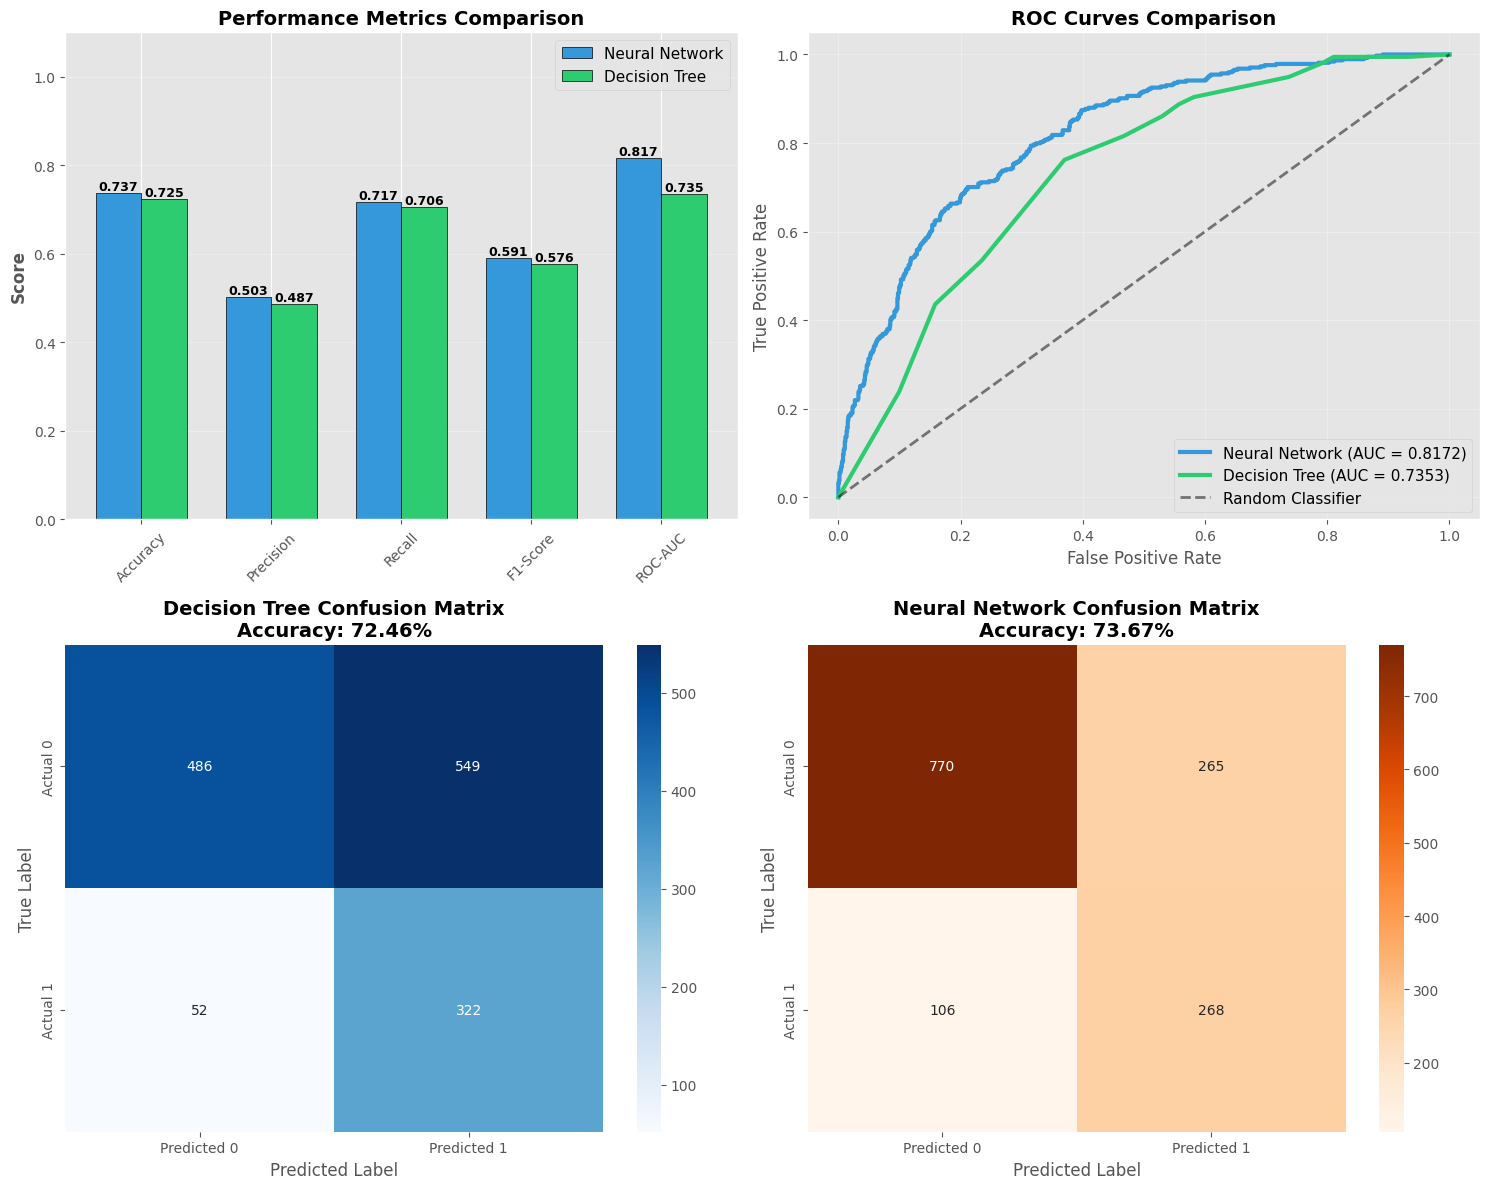


CONFUSION MATRIX DETAILS

DECISION TREE Confusion Matrix:
True Negatives (TN):  486
False Positives (FP): 549
False Negatives (FN): 52
True Positives (TP):  322

Decision Tree Error Rate: 42.65%

------------------------------------------------------------

NEURAL NETWORK Confusion Matrix:
True Negatives (TN):  770
False Positives (FP): 265
False Negatives (FN): 106
True Positives (TP):  268

Neural Network Error Rate: 26.33%

TASK 2 COMPLETE - MODEL IMPLEMENTATION DONE!


In [823]:
print("\n" + "="*80)
print("VISUAL MODEL COMPARISON")
print("="*80)

# Get the metrics from your results
# For Neural Network - use the names from your NN_RESULTS dictionary
nn_accuracy = NN_RESULTS["accuracy"]  # 0.7395
nn_precision = NN_RESULTS["precision"]  # 0.5064
nn_recall = NN_RESULTS["recall"]  # 0.7406
nn_f1 = NN_RESULTS["f1"]  # 0.6015
nn_auc = NN_RESULTS["auc"]  # 0.8226

# For Decision Tree - calculate ROC-AUC if not already done
from sklearn.metrics import roc_curve, auc, confusion_matrix

# Calculate ROC-AUC for Decision Tree
y_prob_dt = best_dt.predict_proba(X_test_scaled)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Decision Tree metrics (from your variables)
dt_accuracy = dt_accuracy  # 0.72
dt_precision = dt_precision  # 0.49
dt_recall = dt_recall  # 0.71
dt_f1 = dt_f1  # 0.58

# For Neural Network ROC curve
fpr_nn, tpr_nn, _ = roc_curve(y_test_np, y_prob_nn)

# Get predictions for confusion matrices
y_pred_dt = best_dt.predict(X_test_scaled)
y_pred_nn = (y_prob_nn > 0.5).astype(int)  # Using threshold 0.5

# Calculate confusion matrices
cm_dt = confusion_matrix(y_test, y_pred_dt)
cm_nn = confusion_matrix(y_test_np, y_pred_nn)

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Bar chart comparison (Top Left)
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC']
nn_scores = [nn_accuracy, nn_precision, nn_recall, nn_f1, nn_auc]
dt_scores = [dt_accuracy, dt_precision, dt_recall, dt_f1, roc_auc_dt]

x = np.arange(len(metrics))
width = 0.35

bars1 = axes[0, 0].bar(x - width/2, nn_scores, width, label='Neural Network',
                       color='#3498db', edgecolor='black')
bars2 = axes[0, 0].bar(x + width/2, dt_scores, width, label='Decision Tree',
                       color='#2ecc71', edgecolor='black')

# Add value labels on bars
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{height:.3f}',
                       ha='center', va='bottom', fontsize=9, fontweight='bold')

axes[0, 0].set_ylabel('Score', fontsize=12, fontweight='bold')
axes[0, 0].set_title('Performance Metrics Comparison', fontsize=14, fontweight='bold')
axes[0, 0].set_xticks(x)
axes[0, 0].set_xticklabels(metrics, rotation=45)
axes[0, 0].legend(fontsize=11)
axes[0, 0].grid(axis='y', alpha=0.3)
axes[0, 0].set_ylim([0, 1.1])

# ROC Curves Comparison (Top Right)
axes[0, 1].plot(fpr_nn, tpr_nn, linewidth=3,
                label=f'Neural Network (AUC = {nn_auc:.4f})', color='#3498db')
axes[0, 1].plot(fpr_dt, tpr_dt, linewidth=3,
                label=f'Decision Tree (AUC = {roc_auc_dt:.4f})', color='#2ecc71')
axes[0, 1].plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier', alpha=0.5)
axes[0, 1].set_title('ROC Curves Comparison', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('False Positive Rate', fontsize=12)
axes[0, 1].set_ylabel('True Positive Rate', fontsize=12)
axes[0, 1].legend(loc='lower right', fontsize=11)
axes[0, 1].grid(True, alpha=0.3)

# Decision Tree Confusion Matrix (Bottom Left)
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'],
            ax=axes[1, 0])
axes[1, 0].set_title(f'Decision Tree Confusion Matrix\nAccuracy: {dt_accuracy:.2%}',
                     fontsize=14, fontweight='bold')
axes[1, 0].set_ylabel('True Label', fontsize=12)
axes[1, 0].set_xlabel('Predicted Label', fontsize=12)

# Neural Network Confusion Matrix (Bottom Right)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'],
            ax=axes[1, 1])
axes[1, 1].set_title(f'Neural Network Confusion Matrix\nAccuracy: {nn_accuracy:.2%}',
                     fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('True Label', fontsize=12)
axes[1, 1].set_xlabel('Predicted Label', fontsize=12)

plt.tight_layout()
plt.show()

# Print confusion matrix details
print("\n" + "="*60)
print("CONFUSION MATRIX DETAILS")
print("="*60)

print("\nDECISION TREE Confusion Matrix:")
print(f"True Negatives (TN):  {cm_dt[0, 0]}")  # Class 0 correctly classified as 0
print(f"False Positives (FP): {cm_dt[0, 1]}")  # Class 0 incorrectly classified as 1
print(f"False Negatives (FN): {cm_dt[1, 0]}")  # Class 1 incorrectly classified as 0
print(f"True Positives (TP):  {cm_dt[1, 1]}")  # Class 1 correctly classified as 1

print(f"\nDecision Tree Error Rate: {(cm_dt[0,1] + cm_dt[1,0])/cm_dt.sum():.2%}")

print("\n" + "-"*60)

print("\nNEURAL NETWORK Confusion Matrix:")
print(f"True Negatives (TN):  {cm_nn[0, 0]}")  # Class 0 correctly classified as 0
print(f"False Positives (FP): {cm_nn[0, 1]}")  # Class 0 incorrectly classified as 1
print(f"False Negatives (FN): {cm_nn[1, 0]}")  # Class 1 incorrectly classified as 0
print(f"True Positives (TP):  {cm_nn[1, 1]}")  # Class 1 correctly classified as 1

print(f"\nNeural Network Error Rate: {(cm_nn[0,1] + cm_nn[1,0])/cm_nn.sum():.2%}")

print("\n" + "="*80)
print("TASK 2 COMPLETE - MODEL IMPLEMENTATION DONE!")
print("="*80)